# Problem Statememt - 1

The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine. 

The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.



Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.



Attribute Information:

The explanations of sensor measurements and their brief statistics are given below.

Variable (Abbr.) Unit Min Max Mean

Ambient temperature (AT) C â€“6.23 37.10 17.71

Ambient pressure (AP) mbar 985.85 1036.56 1013.07

Ambient humidity (AH) (%) 24.08 100.20 77.87

Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93

Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56

Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43

Turbine after temperature (TAT) C 511.04 550.61 546.16

Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06

Turbine energy yield (TEY) MWH 100.02 179.50 133.51

Carbon monoxide (CO) mg/m3 0.00 44.10 2.37

Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
ls

 Volume in drive C is Windows 10 SSD
 Volume Serial Number is F679-1CA0

 Directory of C:\Users\karan\ExcelR Somnath sir\Assignments\Neural Network

18-11-2022  09:53 AM    <DIR>          .
18-11-2022  09:19 AM    <DIR>          ..
18-11-2022  09:33 AM    <DIR>          .ipynb_checkpoints
18-11-2022  09:14 AM            46,843 forestfires.csv
18-11-2022  09:14 AM         1,155,536 gas_turbines.csv
18-11-2022  09:14 AM             1,130 problem statment(Gas turbines).txt
18-11-2022  09:14 AM                61 Problem_statement(fireforests).txt
18-11-2022  09:53 AM             2,472 Untitled.ipynb
               5 File(s)      1,206,042 bytes
               3 Dir(s)  31,820,218,368 bytes free


In [4]:
#loading Datatset
data = pd.read_csv('Gas_turbines.csv')
data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [5]:
data.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [7]:
data.duplicated().sum()

0

In [8]:
data.corr()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.207495,-0.100705,-0.088588,-0.600006
AP,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.146939,0.131198,0.041614,0.256744
AH,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.110272,-0.182010,0.165505,0.143061
AFDP,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.717995,0.727152,-0.334207,-0.037299
GTEP,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.977042,0.993784,-0.508259,-0.208496
TIT,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.891587,0.887238,-0.688272,-0.231636
TAT,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.720356,-0.744740,0.063404,0.009888
TEY,-0.207495,0.146939,-0.110272,0.717995,0.977042,0.891587,-0.720356,1.000000,0.988473,-0.541751,-0.102631
CDP,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,0.988473,1.000000,-0.520783,-0.169103
CO,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.541751,-0.520783,1.000000,0.316743


# Splitting data in X and Y

In [9]:
Y = data.iloc[:,7]

In [10]:
Y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

In [11]:
X=data.drop(columns=('TEY'),axis=1)

In [12]:
X

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


### Splitting data into train data and test data

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [17]:
x_train.shape

(12031, 10)

In [18]:
y_train.shape

(12031,)

### Building Model

In [19]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(15,input_dim=10,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='linear'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                165       
                                                                 
 dense_1 (Dense)             (None, 10)                160       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 336
Trainable params: 336
Non-trainable params: 0
_________________________________________________________________


In [50]:
# Compile Model
model.compile(loss='mse',optimizer='adam',metrics=['mse','mae'])

In [51]:
#Fit the model
history=model.fit(x_train, y_train, validation_data=(x_test,y_test),epochs =50, batch_size=1000)

Epoch 1/50
13/13 [==============================] - 2s 30ms/step - loss: 3058.8911 - mse: 3058.8911 - mae: 43.2333 - val_loss: 615.8210 - val_mse: 615.8210 - val_mae: 21.1705
Epoch 2/50
13/13 [==============================] - 0s 6ms/step - loss: 654.7401 - mse: 654.7401 - mae: 22.0227 - val_loss: 195.9619 - val_mse: 195.9619 - val_mae: 11.3815
Epoch 3/50
13/13 [==============================] - 0s 6ms/step - loss: 237.1782 - mse: 237.1782 - mae: 12.6086 - val_loss: 228.9124 - val_mse: 228.9124 - val_mae: 12.4946
Epoch 4/50
13/13 [==============================] - 0s 5ms/step - loss: 192.1486 - mse: 192.1486 - mae: 11.1536 - val_loss: 198.4121 - val_mse: 198.4121 - val_mae: 11.5155
Epoch 5/50
13/13 [==============================] - 0s 5ms/step - loss: 178.8054 - mse: 178.8054 - mae: 10.7560 - val_loss: 176.0615 - val_mse: 176.0615 - val_mae: 10.6767
Epoch 6/50
13/13 [==============================] - 0s 5ms/step - loss: 173.4339 - mse: 173.4339 - mae: 10.4975 - val_loss: 173.5920 - va

Epoch 49/50
13/13 [==============================] - 0s 4ms/step - loss: 105.5232 - mse: 105.5232 - mae: 8.0476 - val_loss: 105.9647 - val_mse: 105.9647 - val_mae: 8.1023
Epoch 50/50
13/13 [==============================] - 0s 4ms/step - loss: 104.0725 - mse: 104.0725 - mae: 7.9874 - val_loss: 104.4008 - val_mse: 104.4008 - val_mae: 8.0402


In [52]:
scores = model.evaluate(x_train, y_train)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

376/376 [==============================] - 0s 1ms/step - loss: 103.2314 - mse: 103.2314 - mae: 7.9467
mse: 10323.14%


# Visualize training history

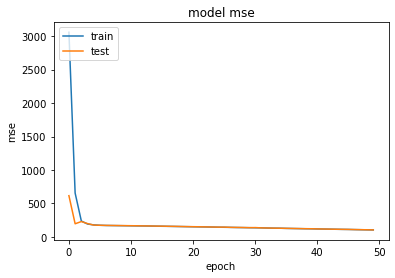

In [54]:
# summarize history for accuracy
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

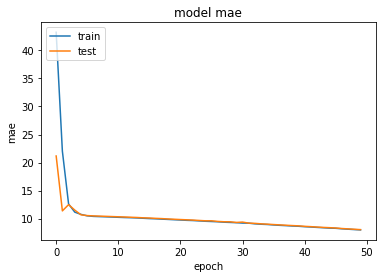

In [56]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

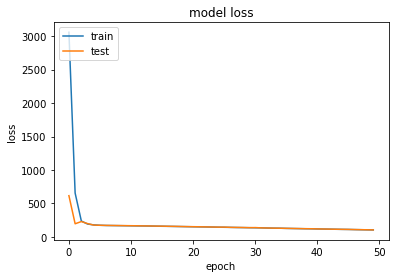

In [57]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [59]:
# evaluate the model

y_train_pred= model.predict(x_train)
y_test_pred= model.predict(x_test)

from sklearn.metrics import mean_squared_error

train_rmse = mean_squared_error(y_train,y_train_pred,squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred,squared=False)

print('Training set rmse: %.3f, Testing set rmse: %.3f' % (train_rmse, test_rmse))

94/94 [==============================] - 0s 1ms/step
Training set rmse: 10.160, Testing set rmse: 10.218


## Hyperparameter Tuning using RandomizedSearchCV

In [60]:
from sklearn.model_selection import RandomizedSearchCV, KFold
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasRegressor

In [67]:
# Building a keras regression model

def keras_reg_model(learning_rate,activation_function,init,neuron1,neuron2):
    
    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.Dense(neuron1,input_dim = 10,kernel_initializer = init,activation = activation_function))
 
    model.add(tf.keras.layers.Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))

    model.add(tf.keras.layers.Dense(1,activation = 'linear'))
    
    adam = Adam(lr = learning_rate)
    
    model.compile(loss = 'mse',optimizer = adam,metrics = ['mse','mae'])
    return model

In [68]:
# Wrapping the keras model in a object

keras_reg = KerasRegressor(build_fn = keras_reg_model,verbose = 0)

C:\Users\karan\AppData\Local\Temp\ipykernel_36520\2207362372.py:3: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = KerasRegressor(build_fn = keras_reg_model,verbose = 0)


In [69]:
# Define the search parameters

batch_size = [10,50,100,500,1000,2000]
epochs = [25,50,80,100,150]
learning_rate = [0.001,0.01,0.1]

activation_function = ['elu','relu','linear']
init = ['uniform','normal','zero']
neuron1 = [5,10,20,30]
neuron2 = [5,10,20,30]


# Create a dictionary of the parameters

param_grids = dict(batch_size = batch_size,epochs = epochs,learning_rate = learning_rate,
                   activation_function = activation_function,init = init,neuron1 = neuron1,neuron2 = neuron2)


# Build and fit the RandomizedSearchCV

random_search = RandomizedSearchCV(estimator = keras_reg,param_distributions = param_grids,cv = 5,n_jobs=-1,verbose = 10,
                                   random_state=40)
random_result = random_search.fit(x_train,y_train)



Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\karan\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [70]:
# Summarize the results
print('Best score:',random_result.best_score_)
print('Best parameters:',random_result.best_params_)


Best score: -3.158348321914673
Best parameters: {'neuron2': 30, 'neuron1': 10, 'learning_rate': 0.001, 'init': 'normal', 'epochs': 50, 'batch_size': 100, 'activation_function': 'relu'}


In [73]:
## storing the best parameters in a variable
## fitting the model with best parameters

d1= random_result.best_params_

keras_tuned=keras_reg_model(learning_rate=d1['learning_rate'],activation_function=d1['activation_function'],init=d1['init'],
                                                                                       neuron1=d1['neuron1'],neuron2=d1['neuron2'])

# Training and evaluating the model
history2=keras_tuned.fit(x_train, y_train, validation_data=(x_test,y_test),
                         epochs =d1['epochs'], batch_size=d1['batch_size'])


Epoch 1/50
121/121 [==============================] - 1s 5ms/step - loss: 3763.5059 - mse: 3763.5059 - mae: 41.8515 - val_loss: 241.0436 - val_mse: 241.0436 - val_mae: 11.4145
Epoch 2/50
121/121 [==============================] - 0s 2ms/step - loss: 237.2204 - mse: 237.2204 - mae: 11.0017 - val_loss: 235.7929 - val_mse: 235.7929 - val_mae: 11.1458
Epoch 3/50
121/121 [==============================] - 0s 2ms/step - loss: 232.4161 - mse: 232.4161 - mae: 10.9759 - val_loss: 230.4113 - val_mse: 230.4113 - val_mae: 11.1123
Epoch 4/50
121/121 [==============================] - 0s 2ms/step - loss: 225.9919 - mse: 225.9919 - mae: 10.7695 - val_loss: 223.3611 - val_mse: 223.3611 - val_mae: 10.8046
Epoch 5/50
121/121 [==============================] - 0s 3ms/step - loss: 218.8446 - mse: 218.8446 - mae: 10.6362 - val_loss: 226.6359 - val_mse: 226.6359 - val_mae: 11.9481
Epoch 6/50
121/121 [==============================] - 0s 3ms/step - loss: 211.9994 - mse: 211.9994 - mae: 10.5433 - val_loss: 21

Epoch 50/50
121/121 [==============================] - 0s 2ms/step - loss: 2.6654 - mse: 2.6654 - mae: 1.1996 - val_loss: 2.5551 - val_mse: 2.5551 - val_mae: 1.1959


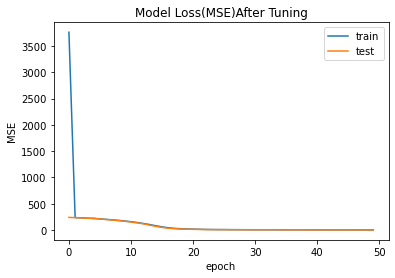

In [74]:
# PLotting Loss(MSE) After Tuning

plt.title('Model Loss(MSE)After Tuning')
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='test')
plt.ylabel('MSE')
plt.xlabel('epoch')

plt.legend()
plt.show()

In [75]:
# evaluate the model

y_train_pred_tuned= keras_tuned.predict(x_train)
y_test_pred_tuned= keras_tuned.predict(x_test)

from sklearn.metrics import mean_squared_error

train_rmse_tuned = mean_squared_error(y_train,y_train_pred_tuned,squared=False)
test_rmse_tuned = mean_squared_error(y_test, y_test_pred_tuned,squared=False)

print('Training set rmse : %.3f, Testing set rmse: %.3f' % (train_rmse_tuned, test_rmse_tuned))

94/94 [==============================] - 0s 1ms/step
Training set rmse : 1.613, Testing set rmse: 1.598


## Comparing base model and tuned model

In [76]:
result=pd.DataFrame({'models':['base model','tuned model'],'train rmse':[train_rmse,train_rmse_tuned],
                     'test rmse':[test_rmse,test_rmse_tuned]})
result

,models,train rmse,test rmse
0,base model,10.160284,10.217670
1,tuned model,1.612537,1.598458


For both base model and tuned model, the difference between rmse for train and test set is very low indicating almost no overfitting.

For tuned model,the rmse has decreased compared to base model suggesting that hypertuning parameters has increased the efficiency of this regression model.

# Problem Statement - 2
PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS


In [78]:
#loading datasets
df=pd.read_csv('forestfires.csv')

In [79]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [81]:
df['size_category'].unique()

array(['small', 'large'], dtype=object)

In [82]:
from sklearn import preprocessing

In [83]:
label_encoder=preprocessing.LabelEncoder()

In [84]:
df['size_categ']=label_encoder.fit_transform(df['size_category'])

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [86]:
df[['size_category','size_categ']].head()

,size_category,size_categ
0,small,1
1,small,1
2,small,1
3,small,1
4,small,1


In [87]:
df1=df.drop(columns=(['month','day','size_category']),axis=1)

In [88]:
df1.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_categ
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,1


In [90]:
df1.shape

(517, 29)

In [93]:
df1.duplicated().sum()

0

In [92]:
df1=df1.drop_duplicates()

In [94]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509 entries, 0 to 516
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   FFMC        509 non-null    float64
 1   DMC         509 non-null    float64
 2   DC          509 non-null    float64
 3   ISI         509 non-null    float64
 4   temp        509 non-null    float64
 5   RH          509 non-null    int64  
 6   wind        509 non-null    float64
 7   rain        509 non-null    float64
 8   area        509 non-null    float64
 9   dayfri      509 non-null    int64  
 10  daymon      509 non-null    int64  
 11  daysat      509 non-null    int64  
 12  daysun      509 non-null    int64  
 13  daythu      509 non-null    int64  
 14  daytue      509 non-null    int64  
 15  daywed      509 non-null    int64  
 16  monthapr    509 non-null    int64  
 17  monthaug    509 non-null    int64  
 18  monthdec    509 non-null    int64  
 19  monthfeb    509 non-null    i

# Splitting data in X and Y

In [95]:
X=df1.iloc[:,0:-1]

In [96]:
Y=df1.iloc[:,-1]

In [97]:
X

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_categ, Length: 509, dtype: int32

# Splitting data in train and test data

In [122]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

In [123]:
mod=tf.keras.models.Sequential()
mod.add(tf.keras.layers.Dense(42,input_dim=28,activation='relu'))
mod.add(tf.keras.layers.Dense(28,activation='relu'))
mod.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [124]:
mod.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 42)                1218      
                                                                 
 dense_22 (Dense)            (None, 28)                1204      
                                                                 
 dense_23 (Dense)            (None, 1)                 29        
                                                                 
Total params: 2,451
Trainable params: 2,451
Non-trainable params: 0
_________________________________________________________________


In [125]:
# Compile model
mod.compile(loss ='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [126]:
y_train.shape

(356,)

In [127]:
x_train.shape

(356, 28)

In [128]:
# Training and evaluating the model
history=mod.fit(x_train, y_train, validation_data=(x_test,y_test),epochs =50, batch_size=10)

Epoch 1/50
36/36 [==============================] - 2s 14ms/step - loss: 14.4959 - accuracy: 0.6096 - val_loss: 2.1775 - val_accuracy: 0.5948
Epoch 2/50
36/36 [==============================] - 0s 3ms/step - loss: 1.2502 - accuracy: 0.7022 - val_loss: 0.6581 - val_accuracy: 0.8105
Epoch 3/50
36/36 [==============================] - 0s 3ms/step - loss: 0.5657 - accuracy: 0.7809 - val_loss: 0.5220 - val_accuracy: 0.8170
Epoch 4/50
36/36 [==============================] - 0s 3ms/step - loss: 0.6103 - accuracy: 0.7753 - val_loss: 0.8099 - val_accuracy: 0.8039
Epoch 5/50
36/36 [==============================] - 0s 3ms/step - loss: 0.3964 - accuracy: 0.8427 - val_loss: 0.2905 - val_accuracy: 0.9020
Epoch 6/50
36/36 [==============================] - 0s 3ms/step - loss: 0.3433 - accuracy: 0.8624 - val_loss: 0.2686 - val_accuracy: 0.8889
Epoch 7/50
36/36 [==============================] - 0s 3ms/step - loss: 0.2676 - accuracy: 0.9073 - val_loss: 0.4489 - val_accuracy: 0.8431
Epoch 8/50
36/36 [

In [129]:
# evaluate the model
scores = mod.evaluate(x_train, y_train)
print("%s: %.2f%%" % (mod.metrics_names[1], scores[1]*100))

12/12 [==============================] - 0s 3ms/step - loss: 0.2266 - accuracy: 0.9213
accuracy: 92.13%


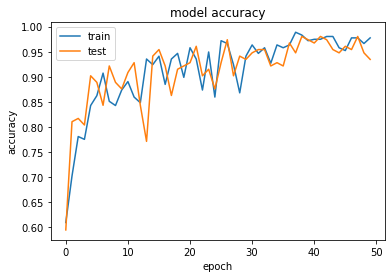

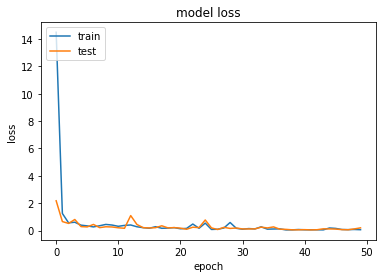

In [130]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [132]:
# evaluate the model

y_train_pred= mod.predict(x_train)
y_test_pred= mod.predict(x_test)

from sklearn.metrics import mean_squared_error

train_rmse = mean_squared_error(y_train,y_train_pred,squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred,squared=False)

print('Training set rmse: %.3f, Testing set rmse: %.3f' % (train_rmse, test_rmse))

5/5 [==============================] - 0s 2ms/step
Training set rmse: 0.253, Testing set rmse: 0.244


By seeing The mse and loss rate is very low and the acuracy of the model is very good.
So we can say that model is performing well for data.
So by seeing model we dont need to do hypertunning of the parameter